In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\nunn}{\hat{\boldsymbol{n}}}
\newcommand{\ee}{\mathrm{e}}
\newcommand{\RR}{\mathbb{R}}
$$
## 0. Indicaciones

**Resuelva los siguientes ejercicios acá mismo en un cuaderno de Jupyter con su nombre, código y la palabra `semana_9`**.

## 1. Función de una variable

### 1.1 Gráficas en 2D (Valor 1.5)

Grafique dos veces la función $f\pap{x}=\ee^{-x}\pap{x^3-5}$ en el intervalo $x\in\pas{0,7}$. Utilice un arreglo de `linspace` con 201 puntos para `x`. La primera gráfica debe ser con `scatter` y la segunda con `plot`. Estas dos gráficas deben mostrarse como dos `subplot` (una al lado de la otra).

### 1.2. Máximo de $f(x)$ en el intervalo (Valor 0.5)

Usando simplemente los arreglos hechos del punto anterior, encuentre el valor $x_m$ y el valor $f\pap{x_m}$ donde la función $f(x)$ es máxima en el intervalo $x\in\pas{0,7}$. Dé su respuesta con un llamado de `print` adecuado.




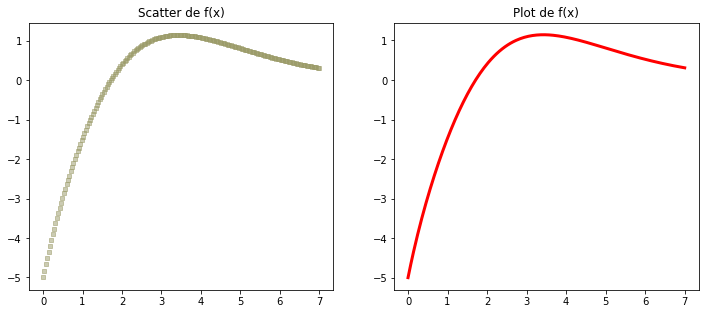

In [55]:
# Punto 1.1
x = np.linspace(0,7,201)
y=np.exp(-x)*(x**3-5)
f=plt.figure(figsize=(12,6))
ax1 = f.add_subplot(121,title="Scatter de f(x)",frameon=True,fc=(0,0,0,0),aspect="equal")
ax2 = f.add_subplot(122,title="Plot de f(x)",frameon=True,fc=(0,0,0,0),aspect="equal")
ax1.scatter(x,y,s=17,marker="s",color=(0.6,0.6,0.4,0.5))
ax2.plot(x,y,color="red",linewidth=3)

In [56]:
# Resolvamos el punto 1.2
i=np.argmax(y)
print("El valor máximo de f(x) encontrado fue en xm={0:.3f} y vale f(xm)={1:0.3f}".format(x[i],y[i]))

El valor máximo de f(x) encontrado fue en xm=3.430 y vale f(xm)=1.145


## 2. Base ortonormal en $\RR ^3$ (Valor 1.0)

Sean dos vectores $\rb _1 =\pap{1,2,1}$ y $\rb _ 2=\pap{3,4,5}$ en el espacio euclidiano $\RR ^3$. Se quiere construir una base ortonormal $\pac{\nunn _1,\nunn _2,\nunn _3}$ siguiendo el método de Grahm-Schmidt y el producto cruz de la siguiente manera:

1. El primer vector es $\nunn _1 = \frac{\rb _1}{\pav{\rb _1}}$
2. El segundo vector se define como $\nunn _2 = \frac{\rb _p}{\pav{\rb _p}}$, donde $\rb _p = \rb_2-\pap{\nunn _1 \cdot \rb_2}\nunn _1$.
3. El tercer vector se define como $\nunn _3 = \nunn _1 \times \nunn _2$

Halle usando `numpy` estos tres vectores e imprima su respectivos arreglos de forma adecuada.

In [57]:
# Hallemos los tres vectores
r1,r2=np.array([1,2,1]),np.array([3,4,5])
n1=(1/np.linalg.norm(r1))*r1
rp=r2-sum(n1*r2)*n1
n2=(1/np.linalg.norm(rp))*rp
n3=np.cross(n1,n2)
print("El vector n1 es {}".format(n1))
print("El vector n2 es {}".format(n2))
print("El vector n3 es {}".format(n3))

El vector n1 es [0.40824829 0.81649658 0.40824829]
El vector n2 es [ 0.12309149 -0.49236596  0.86164044]
El vector n3 es [ 0.90453403 -0.30151134 -0.30151134]


## 3. Funciones de dos variables

Sean $f(x,y)=(x-3)^2+(y-2)^2-xy$, $g(x,y)=y-(x-1)^2$ dos funciones de dos variables reales. Sabemos que en el intervalo $(x,y)\in \pas{0,3}^2$ hay un único punto $(x_0,y_0)$ donde las dos funciones se anulan. Ese punto es el mínimo de la función $h(x,y)=f(x,y)^2+g(x,y)^2$.

### 3.1. Gráficas de las funciones (Valor 1.5)

En una sola figura con 4 `subplot` (arreglo de figuras $2\times 2$), grafique las cuatro funciones $f,g,h,\sqrt{h}$ de tal forma que la primera sea respectivamente una gráfica 3D de superficie (`plot_surface`), la segunda un `scatter` 3D, la tercera una densidad con `pcolormesh` y la cuarta un contorno con `contourf`. La red de puntos debería ser de tamaño $301\times 301$. 

### 3.2. Encuentre el $(x_0,y_0)$ (Valor 0.5)

Imprima adecuadamente la respuesta con un `print`.

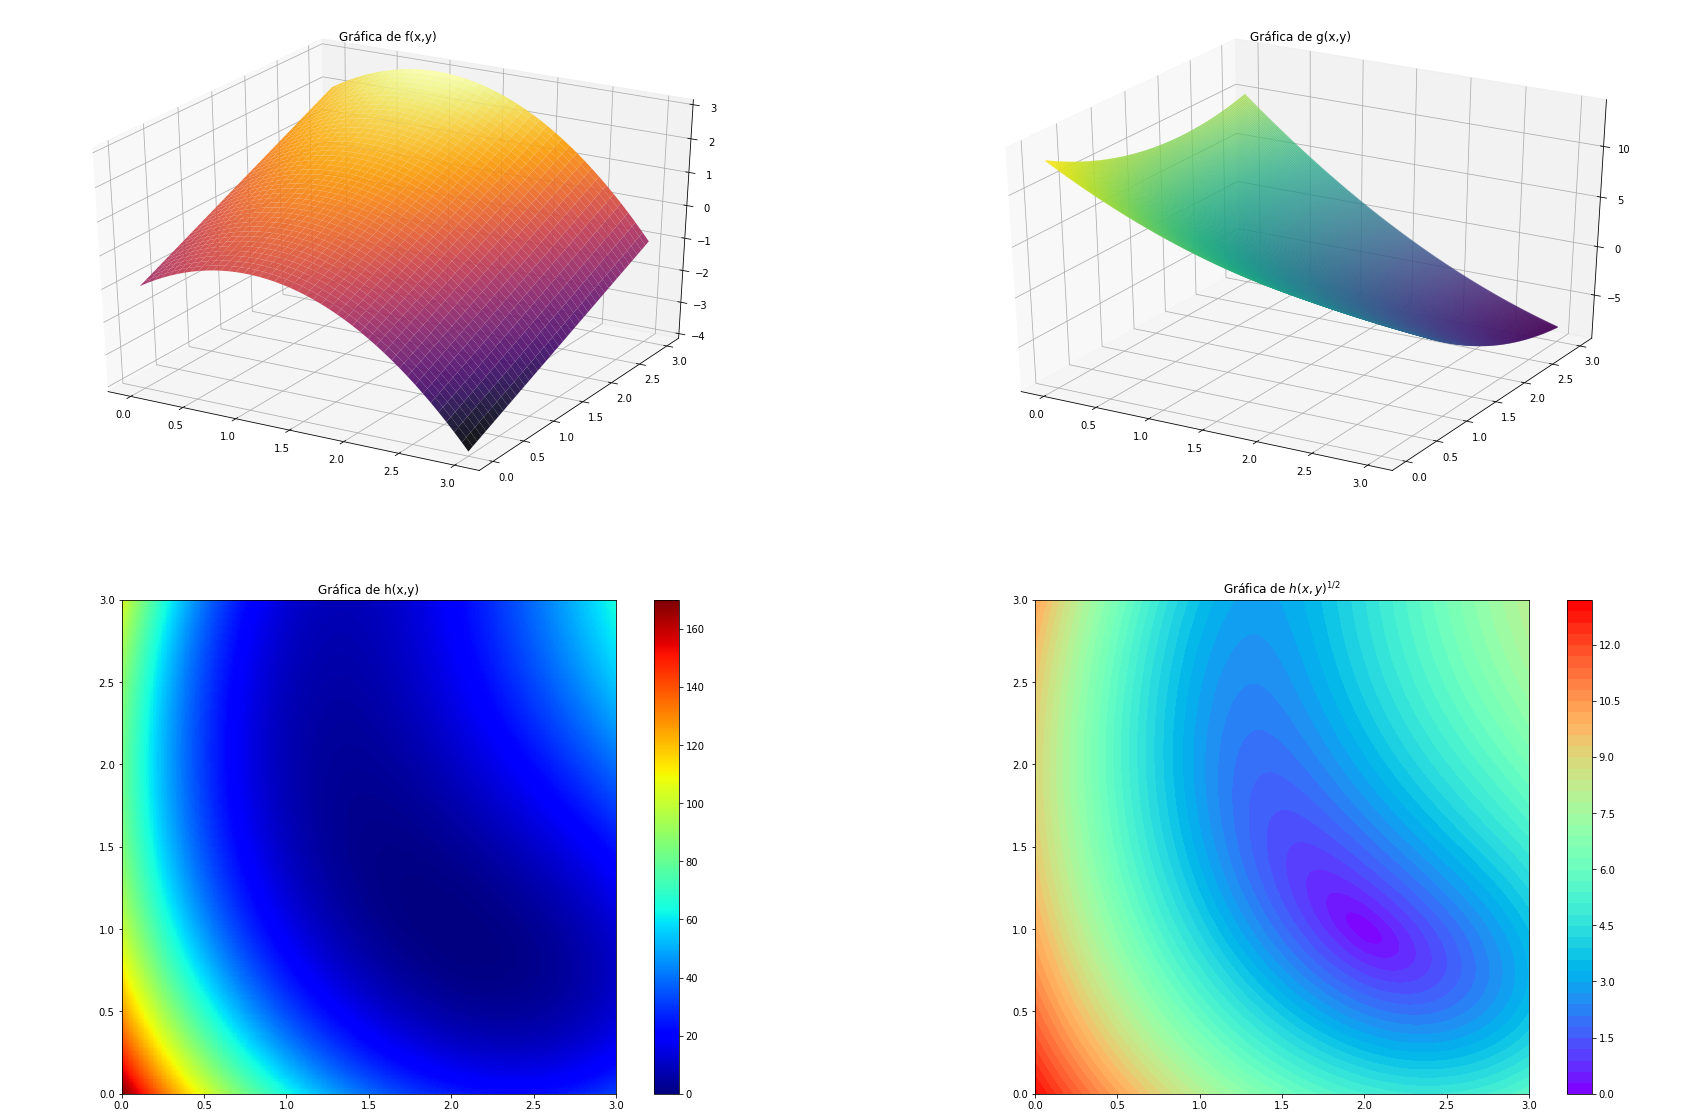

In [58]:
## Solución 3.1.
s = np.linspace(0,3,301)
x,y = np.meshgrid(s,s)
f = lambda x,y:(x-3)**2 + (y-2)**2- x*y
g = lambda x,y:y-(x-1)**2
zf=g(x,y)
zg=f(x,y)
zh=zf**2+zg**2
zhsq=np.sqrt(zh)
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(221, projection="3d",fc=(0,0,0,0),title="Gráfica de f(x,y)")
ax2 = fig.add_subplot(222, projection="3d",fc=(0,0,0,0),title="Gráfica de g(x,y)")
ax3 = fig.add_subplot(223, fc=(0,0,0,0),aspect='equal',title="Gráfica de h(x,y)")
ax4 = fig.add_subplot(224, fc=(0,0,0,0),aspect='equal',title="Gráfica de $h(x,y)^{1/2}$")
ax1.plot_surface(x, y, zf,cmap="inferno",alpha=0.9,edgecolor="none")
ax2.scatter(x, y, zg,c=zg.flatten(),cmap="viridis",alpha=0.7,s=0.2)
im3=ax3.pcolormesh(x,y,zh,cmap="jet")
im4=ax4.contourf(x,y,zhsq,levels=45,cmap="rainbow")
plt.colorbar(im3,ax=ax3)
plt.colorbar(im4,ax=ax4)

In [59]:
# Punto 3.2
z=zh
i,j=np.unravel_index(np.argmin(z),np.shape(z))
xmin,ymin,zmin=x[i,j],y[i,j],z[i,j]
print("El mínimo de h(x,y) se encuentra en el punto (x,y)=({0:.2f},{1:.2f}) y vale h={2:0.2f}".format(xmin,ymin,zmin))

El mínimo de h(x,y) se encuentra en el punto (x,y)=(2.00,1.00) y vale h=0.00
